In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints2/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [-5, 400, noise*0.1],
    [5, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Select mean and variance matrix of initial proposal dist
x0 = [0.015,500,10]

# Create mcmc routine
sampler = pints.SMC(log_posterior,x0)

# Set number of particles
sampler.set_particles(5000)

In [3]:
samples = sampler.run()

Running sequential Monte Carlo
Total number of particles: 5000
Storing 1 sample per 1 iteration
0
1
2


C:\Users\bclamber\Desktop\AllPints\pints2\pints\pints\_sequential\_sequentialMC.py:211: RuntimeWarning: overflow encountered in exp
  r = np.exp(self.tempered_distribution(proposed[i], beta) - self.tempered_distribution(samples[i], beta))


3
4
5
6
7
8


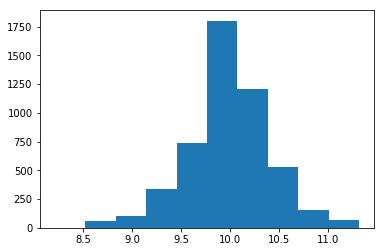

In [10]:
plt.hist(samples[:,2],10)
plt.show()

In [5]:
r=log_posterior([-2.44493730e-03,4.97901735e+02,9.73513943e+00]) - log_posterior([1.34333968e-02,5.01041519e+02,9.50532860e+00])

In [6]:
np.count_nonzero(samples==0)

0